In [5]:
import os
import glob
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from dynamic_routing_analysis import decoding_utils#, plot_utils
import dynamic_routing_analysis as dra

import matplotlib
import matplotlib.font_manager as fm

matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
fm.FontProperties().set_family('arial')

%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib widget

In [8]:
loadpath={}

# loadpath['no_unit_criteria']=r"D:\decoding_results_from_CO\n_units_test_2024-11-06"
# loadpath['svc_medium_unit_criteria']=r"D:\decoding_results_from_CO\n_units_test_medium_unit_criteria_2024-11-07"
# loadpath['lda_medium_criteria']=r"D:\decoding_results_from_CO\lda_test_2024-11-11"
# loadpath['logreg_medium_criteria']=r"D:\decoding_results_from_CO\logreg_test_2024-11-13"

loadpath['no_unit_criteria']=r"D:\decoding_results_from_CO\n_units_test_2024-11-06" 
loadpath['logreg_medium_criteria']=r"D:\decoding_results_from_CO\logreg_test_2024-11-13" #temp
loadpath['logreg_strict_criteria']=r"D:\decoding_results_from_CO\logreg_many_n_units_strict_criteria_2024_12_19"
loadpath['logreg_sliding_rp_criteria']=r"D:\decoding_results_from_CO\logreg_many_n_units_sliding_rp_criteria_2024-12-20"

In [9]:
decoder_results={}
session_list={}
for ll in loadpath.keys():
    all_decoder_results_path=os.path.join(loadpath[ll],'decoder_results_summary.csv')
    decoder_results[ll]=pd.read_csv(all_decoder_results_path)
    session_list[ll]=decoder_results[ll]['session_id'].unique()

In [11]:
#need to match sessions
# shared_sessions=np.intersect1d(np.intersect1d(np.intersect1d(
#     session_list['no_unit_criteria'],session_list['svc_medium_unit_criteria']),
#     session_list['lda_medium_criteria']),session_list['logreg_medium_criteria'])

# shared_sessions=np.intersect1d(np.intersect1d(
#     session_list['logreg_medium_criteria'],session_list['svc_medium_unit_criteria']),
#     session_list['lda_medium_criteria'])
# shared_sessions

shared_sessions=np.intersect1d(np.intersect1d(np.intersect1d(
    session_list['logreg_medium_criteria'],session_list['no_unit_criteria']),
    session_list['logreg_medium_criteria']), session_list['logreg_sliding_rp_criteria'])
shared_sessions

array(['620264_2022-08-02', '626791_2022-08-15', '626791_2022-08-16',
       '626791_2022-08-17', '628801_2022-09-19', '636397_2022-09-27',
       '636766_2023-01-23', '636766_2023-01-24', '644547_2022-12-05',
       '644547_2022-12-06', '644864_2023-02-02', '644866_2023-02-07',
       '644866_2023-02-08', '644866_2023-02-09', '644866_2023-02-10',
       '644867_2023-02-22', '644867_2023-02-23', '646318_2023-01-17',
       '649943_2023-02-13', '649943_2023-02-16', '649944_2023-02-27',
       '660023_2023-08-09', '662892_2023-08-21', '662892_2023-08-22',
       '662892_2023-08-23', '662892_2023-08-24', '662983_2023-05-15',
       '664851_2023-11-13', '664851_2023-11-14', '664851_2023-11-15',
       '664851_2023-11-16', '666986_2023-08-14', '666986_2023-08-15',
       '667252_2023-09-28', '668755_2023-08-29', '668755_2023-08-30',
       '668755_2023-08-31', '670248_2023-08-01', '681532_2023-10-16',
       '681532_2023-10-17', '681532_2023-10-18', '686176_2023-12-04',
       '686176_2023-

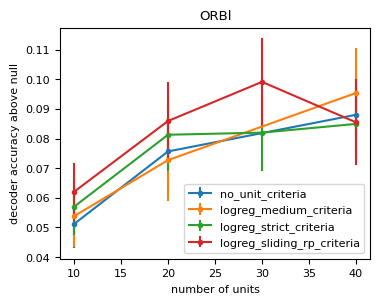

In [19]:
area='ORBl'
savepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-11-13-compare_decoder_models"
plot_n_units=[10,20,30,40]

fig,ax=plt.subplots(1,1,figsize=(4,3))

for ll in list(loadpath.keys())[:]:
    all_decoder_results=decoder_results[ll].query('area==@area and session_id in @shared_sessions and project=="DynamicRouting"')
    #compute fraction significant, difference from null for DynamicRouting and Templeton projects
    all_frac_sig_df,all_diff_from_null_df=decoding_utils.compute_significant_decoding_by_area(all_decoder_results)

    unique_areas=all_decoder_results['area'].unique()
    n_units=[]
    n_units_int=[]
    for col in all_frac_sig_df.filter(like='frac_sig_DR').columns.values:
        if len(col.split('_'))==4:
            if col.split('_')[3]=='all':
                continue

            n_units.append('_'+col.split('_')[3])
            n_units_int.append(int(col.split('_')[3]))
            
        else:
            n_units.append('')
            n_units_int.append(None)

    n_units_int=np.array(n_units_int)

    # for area in unique_areas[:]:

    area_df=all_diff_from_null_df.query('area==@area')

    temp_accuracy=[]
    temp_sem=[]

    for nu in n_units:
        if nu=='all':
            continue
        if len(area_df['diff_from_null_median_DR'+nu].values)==0:
            continue
        temp_accuracy.append(area_df['diff_from_null_median_DR'+nu].values[0])
        temp_sem.append(area_df['diff_from_null_sem_DR'+nu].values[0])

    # if len(temp_accuracy)==0:
    #     continue

    temp_accuracy=np.array(temp_accuracy)
    temp_sem=np.array(temp_sem)

    n_units_incl=[]
    for ii,nui in enumerate(n_units_int):
        if nui in plot_n_units:
            n_units_incl.append(ii)
    n_units_incl=np.array(n_units_incl)

    # ax.axhline(y=0,color='k',linestyle='--',alpha=0.5)
    ax.errorbar(n_units_int[n_units_incl],temp_accuracy[n_units_incl],
                yerr=temp_sem[n_units_incl],marker='.',linestyle='-',label=ll)
    ax.set_xlabel('number of units')
    ax.set_ylabel('decoder accuracy above null')
    ax.set_title(area)
    # ax.set_ylim([-0.05,0.25])

ax.legend()
# fig.savefig(os.path.join(savepath,area+'_decoder_acc_by_n_units_comp.png'),format='png',bbox_inches='tight')
# plt.close(fig)

In [ ]:
#correlation between decoder models

area_wise_decoder_model_comp={}

#loop through areas

